# Questions:
* why don't we take all the features? (no, too many combinations)
* how to decide which model to choose? (metric, transparency, many others)
* can an algorithm make smart choices about features (yes, feature selections)
* how many data points are enough? (50+ often cited but Kristian says this is too few - more like descriptive stats, 200+ better; for Deep Learning  - 10k+)
* Overview of Machine Learning pipeline



In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
df= pd.read_csv("all_penguins_clean.csv")
df.dropna(inplace=True) # quick solve for NaN error in m.fit below

In [54]:
X = df[["Culmen Length (mm)", 'Culmen Depth (mm)']]
y = df["Species"]

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

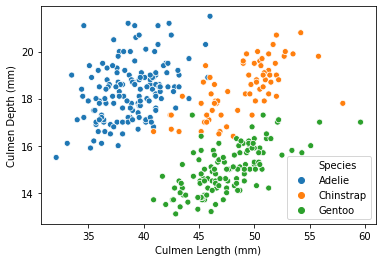

In [55]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

In [56]:
predictions = [] #one prediction for every penguin
for i, row in X.iterrows(): #i = index, row = row, goes through values of row as pd Series
    if row['Culmen Length (mm)'] < 43 :
        if row ['Culmen Depth (mm)'] > 15:
            predictions.append('Adelie')
        else:
            predictions.append('Gentoo')
    else:
        if row['Culmen Depth (mm)'] <= 17:
            predictions.append('Gentoo')
        else:
            predictions.append('Chinstrap')

In [65]:
from sklearn.metrics import accuracy_score

round(accuracy_score(predictions, y), 3)

0.931

## This is called the **CART** algorithm:
* finds out which `if` statements give the best separations
* it is a **divide-and-conquer** algorithm
* it is a **greedy** algorithm
* as a metric, it uses the GINI purity score:

    $ GINI = \sum(p*(1-p_i)) $
    
 $p$ = proportion of points in a given data

If you have an optimal split, GINI = 0

The worst split will be GINI = 0.5 (with two classes)

# With `scikit-learn`:

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [95]:
m = DecisionTreeClassifier(max_depth=2) # we use the max depth parameter - how deep is the tree (=how many qs)?
m.fit(X, y)
ypred = m.predict(X)

In [96]:
round(accuracy_score(ypred,y),3)

0.934

Shouldn't add too many levels of the tree - this can lead to overfitting problems, as the tree gets very precise very fast

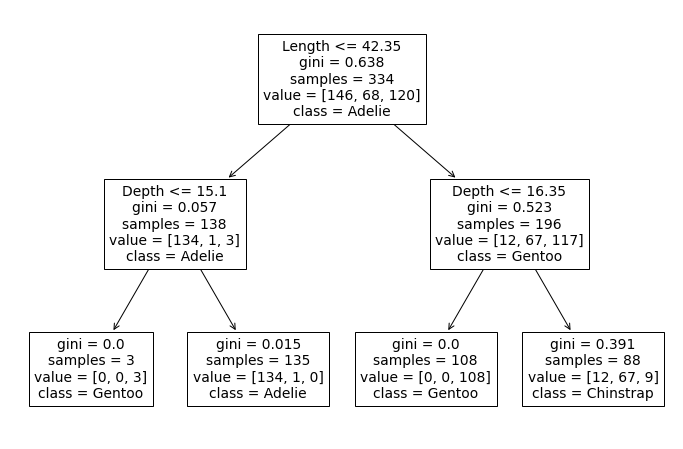

In [97]:
plt.figure(figsize=(12,8))
t = plot_tree(m, feature_names = ["Length", "Depth"], class_names = ["Adelie", "Chinstrap", "Gentoo"]) # creates matplotlib figure
